In [10]:
import overpy
api = overpy.Overpass()
result = api.query("""way["highway"]["highway"!~"footway|cycleway|path|service|track|stop"](45.518327300415,-122.66399502754,45.522281362498,-122.65833556652);out;""")
len(result.ways)

49

In [8]:
# This function converts a OpenStreetMap node into a GeoJSON Feature
def nodeToFeature(node):
    return {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [
                float(node.lon),
                float(node.lat)
            ]
        },
        "properties": node.tags
    }

# This function converts a collection of OpenStreetMap nodes into an array of
# GeoJSON Features
def nodesToFeatures(nodes):
    """
    :param nodes
    :type nodes from overpy.Result (result.nodes)
    :return:
    """
    features = []
    for node in nodes:
        features.append(nodeToFeature(node))
    return features


In [11]:
for way in result.ways:
    way.get_nodes(resolve_missing=True)
len(result.nodes)

304

In [15]:
import io, json
features = nodesToFeatures(result.nodes)
geojson = {
    "type": "FeatureCollection",
    "features": features
}
with open("data/nodes.json", 'w+', encoding='utf-8') as f:
    f.write(json.dumps(geojson, ensure_ascii= False))
    f.close()

In [18]:
import geopandas as gpd
gdf = gpd.read_file("data/nodes.json")
gdf.head()

,direction,highway,source,stop,railway,geometry
0,None,None,None,None,None,POINT (-122.6637971 45.520088)
1,None,None,None,None,None,POINT (-122.6646182 45.5200927)
2,W,stop,None,None,None,POINT (-122.6639709 45.520089)
3,None,None,None,None,None,POINT (-122.6585455 45.5186464)
4,None,None,None,None,None,POINT (-122.6584001 45.5187891)


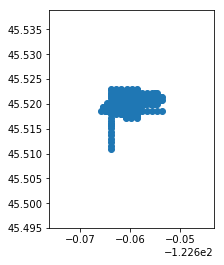

In [20]:
import geoplot as gplt
gdf.plot()